In [1]:
#T1

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

In [4]:
train_data_dir = 'Malariadataset/Train'
test_data_dir = 'Malariadataset/Test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # 'categorical' if you have more than two classes
)

Found 416 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # 'categorical' if you have more than two classes
)

# Using VGG16 as a base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


Found 134 images belonging to 2 classes.




In [7]:
# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # 1 neuron for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10


13/13 [==============================] - 385s 30s/step - loss: 2.2143 - accuracy: 0.5192 - val_loss: 1.7146 - val_accuracy: 0.3284
Epoch 2/10
13/13 [==============================] - 450s 35s/step - loss: 0.8416 - accuracy: 0.6538 - val_loss: 0.8456 - val_accuracy: 0.5224
Epoch 3/10
13/13 [==============================] - 510s 41s/step - loss: 0.4996 - accuracy: 0.7548 - val_loss: 0.5731 - val_accuracy: 0.7015
Epoch 4/10
13/13 [==============================] - 481s 37s/step - loss: 0.3964 - accuracy: 0.8341 - val_loss: 0.4431 - val_accuracy: 0.7537
Epoch 5/10
13/13 [==============================] - 191s 13s/step - loss: 0.3057 - accuracy: 0.8942 - val_loss: 0.4048 - val_accuracy: 0.8284
Epoch 6/10
13/13 [==============================] - 98s 7s/step - loss: 0.2951 - accuracy: 0.9087 - val_loss: 0.4636 - val_accuracy: 0.7836
Epoch 7/10
13/13 [==============================] - 117s 9s/step - loss: 0.2449 - accuracy: 0.9303 - val_loss: 0.3509 - val_accuracy: 0.8657
Epoch 8

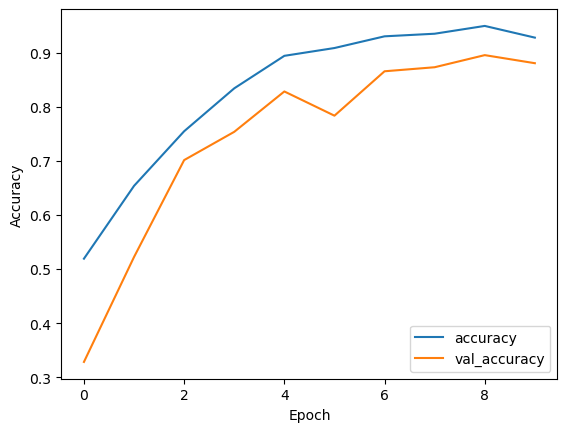

In [8]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

5/5 [==============================] - 24s 4s/step
Confusion Matrix:
[[63 28]
 [32 11]]


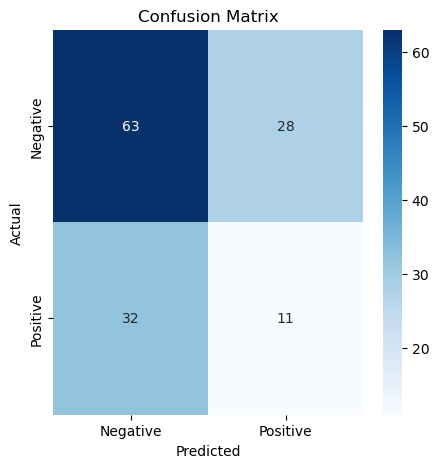


Classification Report:
              precision    recall  f1-score   support

    Negative       0.66      0.69      0.68        91
    Positive       0.28      0.26      0.27        43

    accuracy                           0.55       134
   macro avg       0.47      0.47      0.47       134
weighted avg       0.54      0.55      0.55       134



In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test data
y_pred = model.predict(test_generator).round()

# Get true labels
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))
